In [1]:
## import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan_data = pd.read_csv('loan.csv', low_memory=False)

### Drop Columns containing only NULL values

In [3]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)

### Remove Columns containing > 30% NULL values

In [4]:
loan_data = loan_data.loc[:,loan_data.isnull().sum()/39717*100 < 30]

### Drop Columns containing a single value.

In [5]:
loan_data.drop(loan_data.columns[loan_data.nunique() <= 1],axis=1, inplace=True)

In [6]:
loan_data.shape

(39717, 44)

### Add a new Column Defaulter

In [7]:
loan_data['Defaulter']=np.where(loan_data['loan_status']=='Charged Off',1,0)

In [8]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,Defaulter
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0


In [9]:
type(loan_data['int_rate'])

pandas.core.series.Series

In [10]:
loan_data['int_rate'] = pd.to_numeric(loan_data['int_rate'].map(lambda x: x[:-1]))

### Checking if interest rate is driving factor for defining defaulter

<Axes: xlabel='Defaulter'>

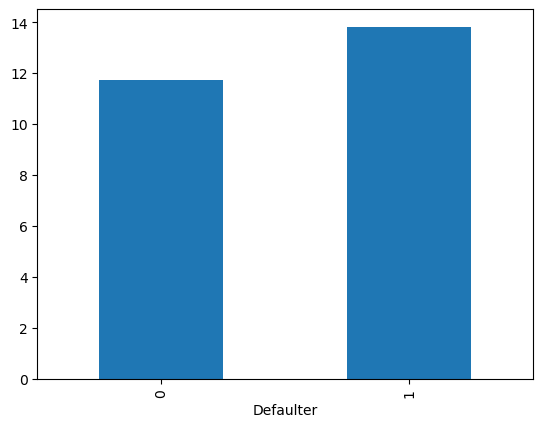

In [16]:
loan_data.groupby(['Defaulter'])['int_rate'].mean().plot(kind = 'bar')


### Checking if grade is driving factor for defining defaulter

In [12]:
grade_loan_data = loan_data.groupby(by='grade',as_index=False).agg({'id':'count','Defaulter':'sum'}).rename(columns = {'id':'cnt_cust','Defaulter':'cnt_defaulter'})

In [13]:
grade_loan_data['pct_defaulter'] = np.round(grade_loan_data['cnt_defaulter']/grade_loan_data['cnt_cust']*100,2)

<Axes: xlabel='grade'>

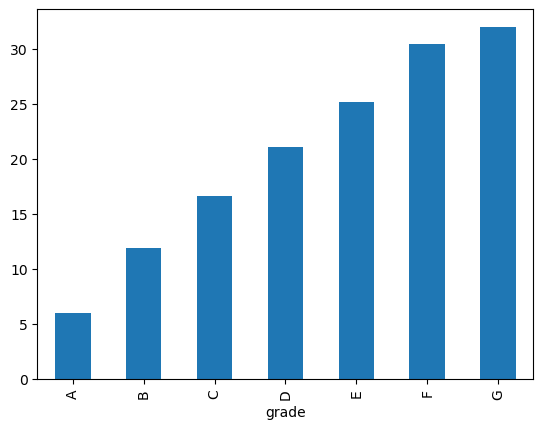

In [28]:
grade_loan_data.groupby(['grade'])['pct_defaulter'].mean().plot(kind = 'bar')

In [25]:
grade_loan_data

,grade,cnt_cust,cnt_defaulter,pct_defaulter
0,A,10085,602,5.97
1,B,12020,1425,11.86
2,C,8098,1347,16.63
3,D,5307,1118,21.07
4,E,2842,715,25.16
5,F,1049,319,30.41
6,G,316,101,31.96


### Checking if verification_status is driving factor for defining defaulter

In [74]:
verification_loan_data=loan_data.groupby(by="verification_status", as_index=False).agg({'id':'count','Defaulter':'sum'}).rename(columns = {'id':'cnt_cust','Defaulter':'cnt_defaulter'})

In [75]:
verification_loan_data['pct_defaulter']=round(verification_loan_data['cnt_defaulter']/verification_loan_data['cnt_cust']*100,2)

<Axes: xlabel='verification_status'>

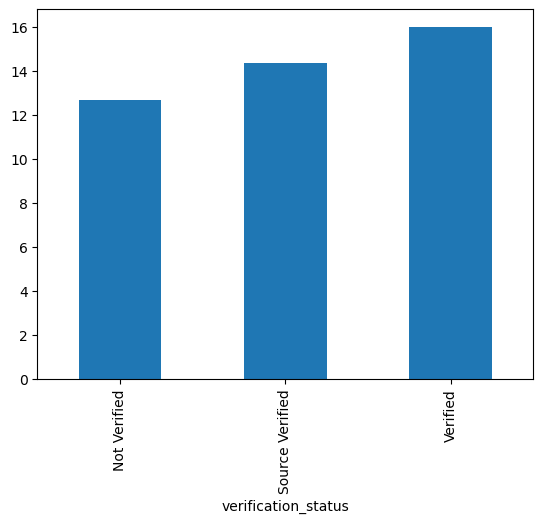

In [71]:
verification_loan_data.groupby(['verification_status'])['pct_defaulter'].mean().plot(kind = 'bar')


### Checking if term is driving factor for defining defaulter

In [76]:
term_loan_data=loan_data.groupby(by="term", as_index=False).agg({'id':'count','Defaulter':'sum'}).rename(columns = {'id':'cnt_cust','Defaulter':'cnt_defaulter'})

In [77]:
term_loan_data['pct_defaulter']=round(term_loan_data['cnt_defaulter'] / term_loan_data['cnt_cust']*100,2)

<Axes: xlabel='term'>

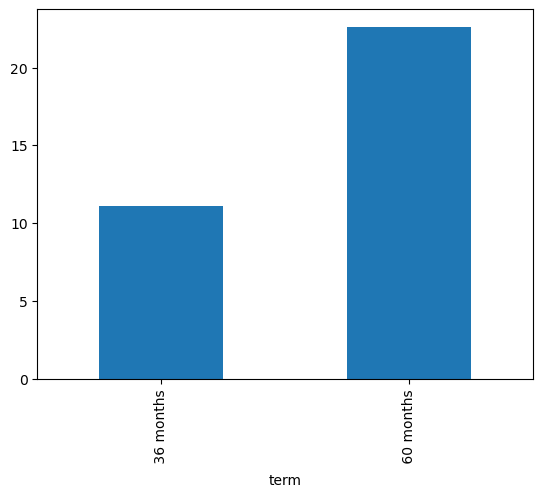

In [36]:
term_loan_data.groupby(['term'])['pct_defaulter'].mean().plot(kind='bar')

### Employment Tenure impact on Default

In [78]:
emp_tenure_data=loan_data.groupby('emp_length', as_index=False).agg({'id':'count','Defaulter':'sum'}).rename(columns={'id':'cnt_cust','Defaulter':'cnt_defaulter'})

In [79]:
emp_tenure_data['pct_default']=round(emp_tenure_data['cnt_defaulter']/emp_tenure_data['cnt_cust']*100,2)

<Axes: xlabel='emp_length'>

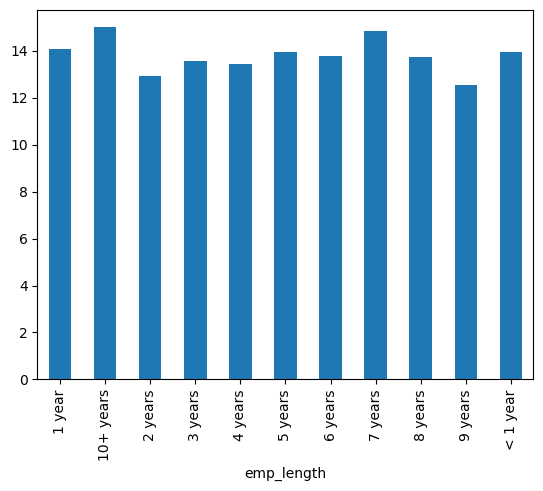

In [51]:
emp_tenure_data.groupby('emp_length')['pct_default'].mean().plot(kind='bar')

### Home Ownership on Default

In [65]:
home_status=loan_data.groupby('home_ownership', as_index=False).agg({'id':'count','Defaulter':'sum'}).rename(columns={'id':'cnt_cust','Defaulter':'cnt_default'})

In [69]:
home_status['pct_defaults']=round(home_status['cnt_default']/home_status['cnt_cust']*100,2)

<Axes: xlabel='home_ownership'>

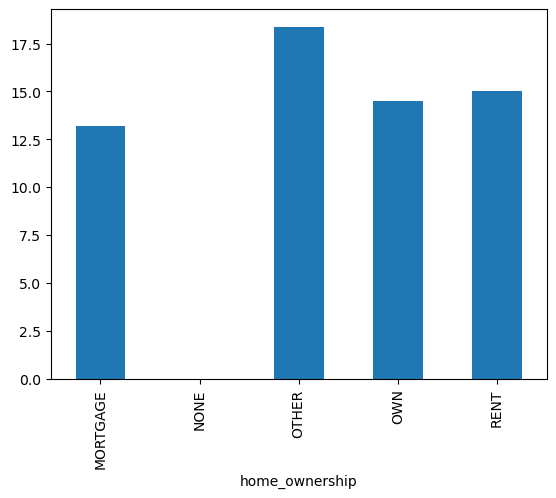

In [73]:
home_status.groupby('home_ownership')['pct_defaults'].mean().plot(kind='bar')

### Purpose on Default


<Axes: xlabel='purpose'>

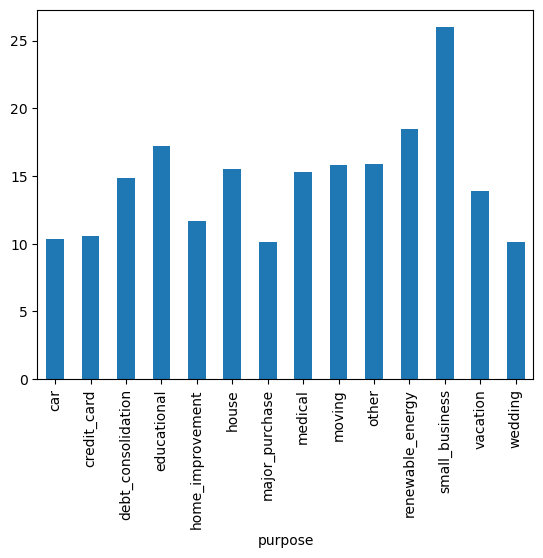

In [80]:
loan_purpose=loan_data.groupby('purpose', as_index=False).agg({'id':'count', 'Defaulter':'sum'}).rename(columns={'id':'cnt_cust','Defaulter':'cnt_default'})
loan_purpose['pct_default']=round(loan_purpose['cnt_default']/loan_purpose['cnt_cust']*100,2)
loan_purpose.groupby('purpose')['pct_default'].mean().plot(kind='bar')

### Number of Inquries in past 6 months vs Default

<Axes: xlabel='inq_last_6mths'>

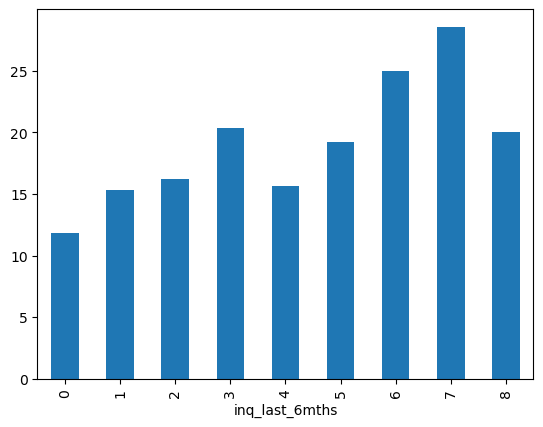

In [114]:
inquiry_data=loan_data.groupby('inq_last_6mths').agg({'id':'count','Defaulter':'sum'}).rename(columns={'id':'cnt_cust','Defaulter':'cnt_default'})
inquiry_data['pct_default']=round(inquiry_data['cnt_default']/inquiry_data['cnt_cust']*100,2)
inquiry_data.groupby('inq_last_6mths')['pct_default'].mean().plot(kind='bar')

### Annual Income vs Default

In [135]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99,1])

In [108]:
loan_data=loan_data[loan_data['annual_inc'] < loan_data.annual_inc.quantile(0.95)]

<Axes: >

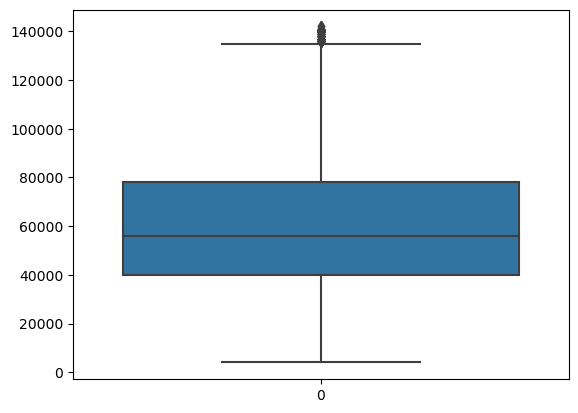

In [117]:
sns.boxplot(loan_data.annual_inc)

In [122]:
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

<Axes: xlabel='annual_inc_groups'>

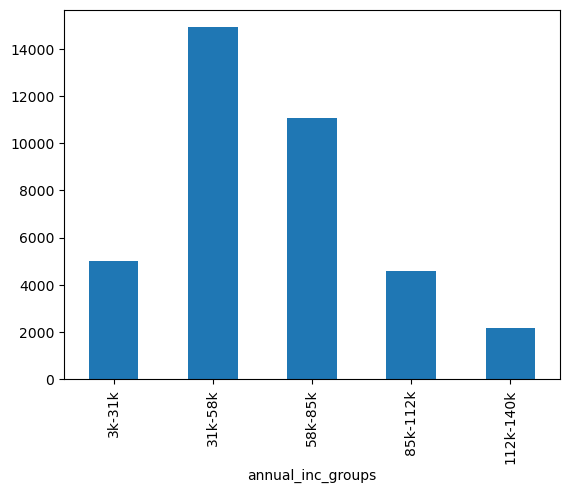

In [134]:
loan_data.groupby('annual_inc_groups')['Defaulter'].count().plot(kind='bar')